In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.optimize import curve_fit
import numpy as np
import tensorflow as tf

# %pip install scikit-learn==1.4.2

np.random.seed(42)
tf.random.set_seed(42)

2025-05-22 11:39:00.933090: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-22 11:39:02.121753: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 11:39:02.932148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
tesla = yf.Ticker("TSLA")

In [4]:
tesla_data = tesla.history(period="max")

In [5]:
tesla_data.reset_index(inplace=True)
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3743,2025-05-15 00:00:00-04:00,340.339996,346.140015,334.720001,342.820007,97882600,0.0,0.0
3744,2025-05-16 00:00:00-04:00,346.239990,351.619995,342.329987,349.980011,95895700,0.0,0.0
3745,2025-05-19 00:00:00-04:00,336.299988,343.000000,333.369995,342.089996,88869900,0.0,0.0
3746,2025-05-20 00:00:00-04:00,347.869995,354.989990,341.630005,343.820007,131715500,0.0,0.0


In [6]:
tesla_data.shape

(3748, 8)

In [7]:
tesla_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3748.000000,3748.000000,3748.000000,3748.000000,3.748000e+03,3748.0,3748.000000
mean,87.483972,89.444356,85.387777,87.465155,9.696306e+07,0.0,0.002134
std,112.897471,115.474825,110.065347,112.815938,7.698658e+07,0.0,0.095233
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,12.383500,12.657333,12.165666,12.432333,4.989600e+07,0.0,0.000000
50%,18.650001,18.992333,18.371667,18.697000,8.290785e+07,0.0,0.000000
75%,188.439999,193.805000,184.342499,189.192501,1.225156e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,0.0,5.000000


In [8]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          3748 non-null   datetime64[ns, America/New_York]
 1   Open          3748 non-null   float64                         
 2   High          3748 non-null   float64                         
 3   Low           3748 non-null   float64                         
 4   Close         3748 non-null   float64                         
 5   Volume        3748 non-null   int64                           
 6   Dividends     3748 non-null   float64                         
 7   Stock Splits  3748 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 234.4 KB


*************************************** LOOP OVER DIFFERENT Sequence-lengths ************************

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# import matplotlib.pyplot as plt
# import seaborn as sb

# features = ['Open', 'High', 'Low', 'Close', 'Volume']

# sequence_lengths = [30, 60, 90, 120]
# results = {
#     "sequence_length": [],
#     "MSE": [],
#     "RMSE": [],
#     "MAE": []
# }


# # Normalize the data
# if tesla_data.empty:
#     print("tesla_data is empty. Please check your data source or loading step.")
# else:
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(tesla_data[features].values)
# # Prepare data
#     X, y = [], []
    
#     for seq_len in sequence_lengths:
#         for i in range(seq_len, len(scaled_data)):
#             X.append(scaled_data[i-seq_len:i])
#             y.append(scaled_data[i, features.index('Close')])
#         X, y = np.array(X), np.array(y)

#     # Train/test split
#     split = int(len(X) * 0.8)
#     X_train, X_test = X[:split], X[split:]
#     y_train, y_test = y[:split], y[split:]

#     # Build model
#     model = Sequential()

#     ## Option 1: LSTM with 2 layers
#     model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
#     model.add(LSTM(units=50, return_sequences=False))  # Last LSTM layer, return_sequences defaults to False
#     model.add(Dense(1)) # Output layer, output predicted close price for only the next day
    
#     # option 2: adding Dropout layers
#    # model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#     # model.add(Dropout(0.2))
#     # model.add(LSTM(units=50, return_sequences=False))
#     # model.add(Dropout(0.2))
#     # model.add(Dense(units=1))  # Predict next closing price

#     # Compile model
#     model.compile(optimizer='rmsprop', loss='mean_squared_error')
#     model.fit(X_train, y_train, epochs=15, batch_size=16, shuffle=False)  #, verbose=0

#     # Predict
#     predictions = model.predict(X_test)
#     close_scaler = MinMaxScaler()
#     close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]
#     predictions = close_scaler.inverse_transform(predictions.reshape(-1, 1))
#     actual = close_scaler.inverse_transform(y_test.reshape(-1, 1))

#     # Metrics
#     mse = mean_squared_error(actual, predictions)
#     rmse = np.sqrt(mse)
#     mae = mean_absolute_error(actual, predictions)
#     mape = np.mean(np.abs((actual - predictions) / actual)) * 100

#     # Store results
#     results["sequence_length"].append(seq_len)
#     results["MSE"].append(mse)
#     results["RMSE"].append(rmse)
#     results["MAE"].append(mae)
#     results["MAPE"].append(mape)

# # Display results
# results_df = pd.DataFrame(results)
# display(results_df)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sb

features = ['Open', 'High', 'Low', 'Close', 'Volume']

sequence_lengths = [30, 60, 90, 120]
results = {
    "sequence_length": [],
    "MSE": [],
    "RMSE": [],
    "MAE": [],
    "MAPE": [],
    "mdae": [],
    "accuracy": [],
    "accuracy_score": [],
    "R2": []
}

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tesla_data[features].values)


for seq_len in sequence_lengths:
    # Prepare data
    X, y = [], []
    for i in range(seq_len, len(scaled_data)):
        X.append(scaled_data[i-seq_len:i])
        y.append(scaled_data[i, features.index('Close')])
    X, y = np.array(X), np.array(y)

    # Train/test split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build model
    model = Sequential()

  
    model.add(LSTM(units=128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
  #  model.add(LSTM(units=32, return_sequences=True))
  #  model.add(Dropout(0.2))
    model.add(LSTM(units=128, return_sequences=False))  # Last LSTM layer, return_sequences defaults to False
 #   model.add(Dense(32, activation='tanh'))  # Extra Dense layer
    model.add(Dense(1)) # Output layer, output predicted close price for only the next day
    
    
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=False, verbose=0)

    # Predict
    predictions = model.predict(X_test)
    close_scaler = MinMaxScaler()
    close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]
    predictions = close_scaler.inverse_transform(predictions.reshape(-1, 1))
    actual = close_scaler.inverse_transform(y_test.reshape(-1, 1))

    # Metrics
    mse = mean_squared_error(actual, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predictions)
    mape = mean_absolute_percentage_error(actual, predictions) * 100
    mdae = np.median(np.abs(actual - predictions))
    accuracy = 1 - (mae / np.mean(actual))
    acc_score = accuracy_score(np.round(actual), np.round(predictions))
    r2 = r2_score(actual, predictions)
    

    # Store results
    results["sequence_length"].append(seq_len)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)
    results["MAE"].append(mae)
    results["MAPE"].append(mape)
    results["mdae"].append(mdae)
    results["accuracy"].append(accuracy)
    results["accuracy_score"].append(acc_score)
    results["R2"].append(r2)

# Display results
results_df = pd.DataFrame(results)
display(results_df)

/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


,sequence_length,MSE,RMSE,MAE,MAPE,mdae,accuracy,accuracy_score,R2
0,30,366.613591,19.147156,16.014719,7.006758,14.693581,0.932603,0.014785,0.912337
1,60,282.218427,16.799358,12.731082,5.437748,9.594719,0.946422,0.037940,0.933060
2,90,358.743297,18.940520,15.489758,6.895241,13.974930,0.934846,0.013661,0.915551
3,120,322.292317,17.952502,13.139106,5.591768,9.972878,0.944734,0.019284,0.924748


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sb

features = ['Open', 'High', 'Low', 'Close', 'Volume']

sequence_lengths = [30, 60, 90, 120]
results = {
    "sequence_length": [],
    "MSE": [],
    "RMSE": [],
    "MAE": [],
    "MAPE": [],
    "R2": []
}

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tesla_data[features].values)


for seq_len in sequence_lengths:
    # Prepare data
    X, y = [], []
    for i in range(seq_len, len(scaled_data)):
        X.append(scaled_data[i-seq_len:i])
        y.append(scaled_data[i, features.index('Close')])
    X, y = np.array(X), np.array(y)

    # Train/test split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build model
    model = Sequential()

  
    model.add(LSTM(units=128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
  #  model.add(LSTM(units=32, return_sequences=True))
  #  model.add(Dropout(0.2))
    model.add(LSTM(units=128, return_sequences=False))  # Last LSTM layer, return_sequences defaults to False
 #   model.add(Dense(32, activation='tanh'))  # Extra Dense layer
    model.add(Dense(1)) # Output layer, output predicted close price for only the next day
    
    
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=False, verbose=0)

    # Predict
    predictions = model.predict(X_test)
    close_scaler = MinMaxScaler()
    close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]
    predictions = close_scaler.inverse_transform(predictions.reshape(-1, 1))
    actual = close_scaler.inverse_transform(y_test.reshape(-1, 1))

    # Metrics
    mse = mean_squared_error(actual, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predictions)
    mape = mean_absolute_percentage_error(actual, predictions) * 100
    r2 = r2_score(actual, predictions)
    

    # Store results
    results["sequence_length"].append(seq_len)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)
    results["MAE"].append(mae)
    results["MAPE (%)"].append(mape)
    results["R2"].append(r2)

# Display results
results_df = pd.DataFrame(results)
display(results_df)

/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


,sequence_length,MSE,RMSE,MAE,MAPE,R2
0,30,397.858353,19.946387,17.045894,7.740581,0.904866
1,60,371.284382,19.268741,14.329395,6.196782,0.911935
2,90,245.410865,15.665595,11.753165,5.028171,0.942230
3,120,336.151140,18.334425,15.395836,6.960581,0.921512


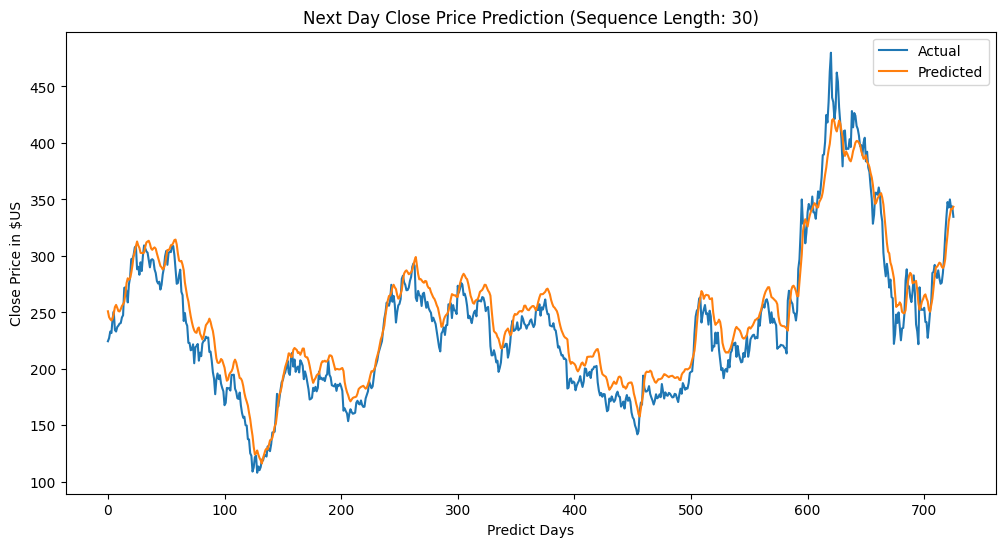

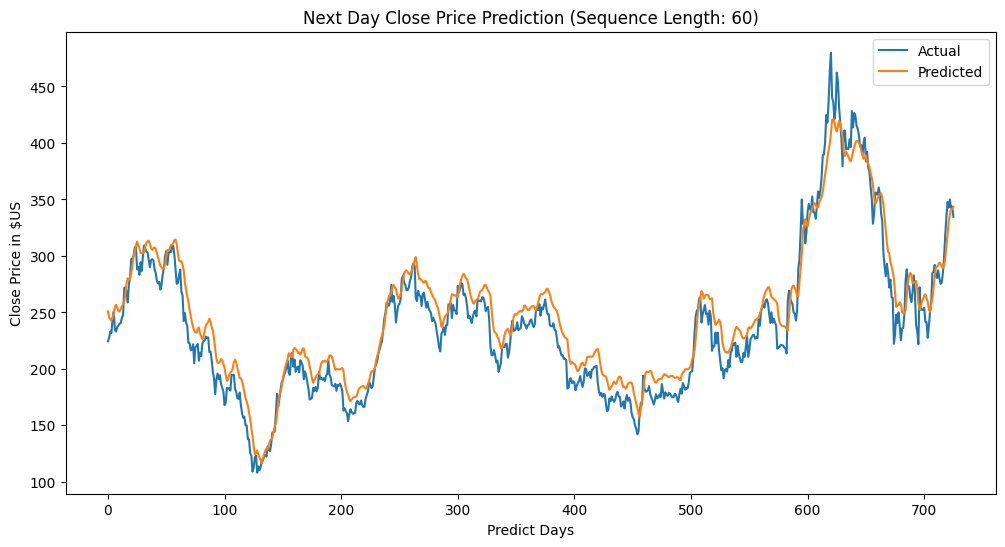

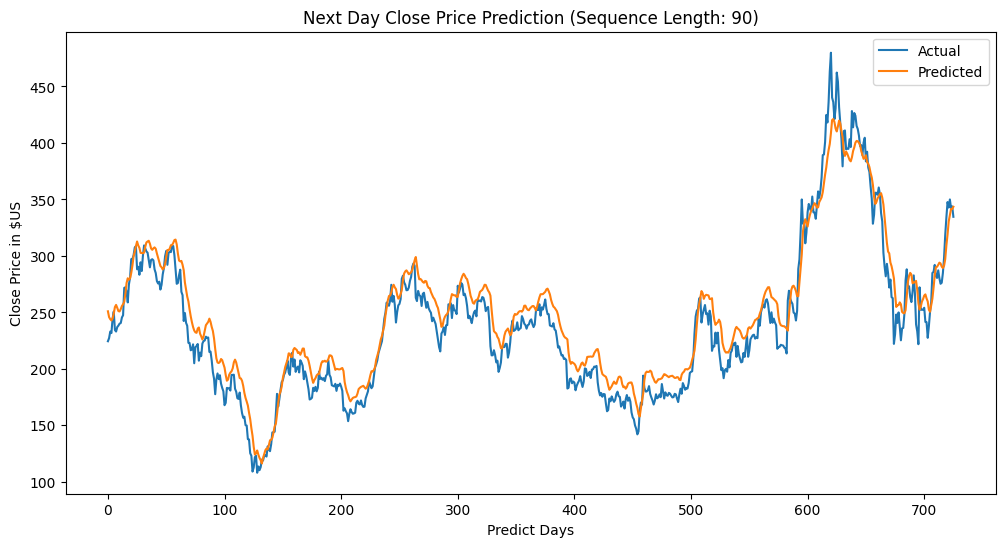

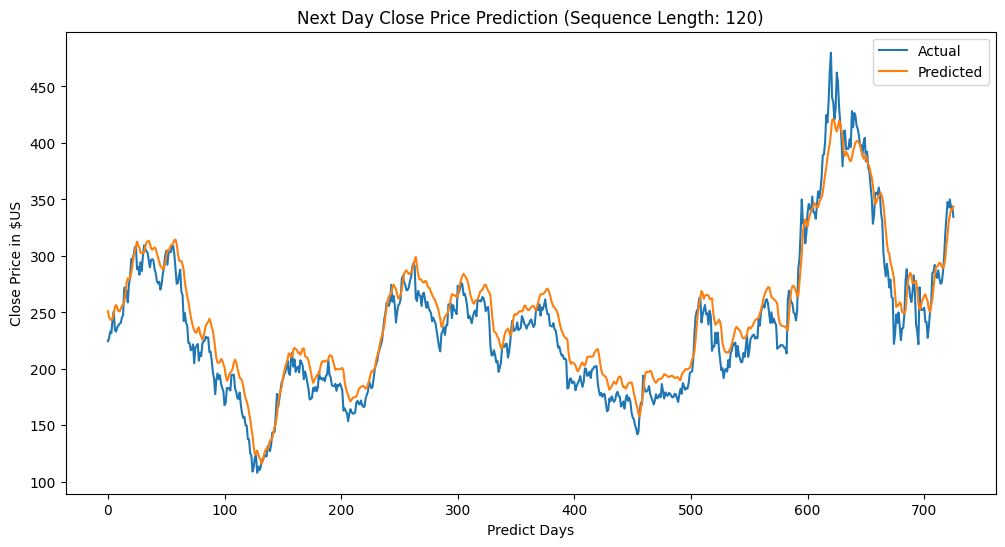

In [33]:
#plot the results
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

for seq_len in sequence_lengths:
    plt.figure(figsize=(12,6))
    plt.plot(actual, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Predict Days')
    plt.ylabel('Close Price in $US')
    plt.title(f'Next Day Close Price Prediction (Sequence Length: {seq_len})')
    plt.legend()
    plt.show()


,Metric,Value
0,Mean Squared Error (MSE),92.197932
1,Root Mean Squared Error (RMSE),9.601975
2,Mean Absolute Error (MAE),6.889861
3,Mean Absolute Percentage Error (MAPE) (%),2.918332
4,R2,0.977205


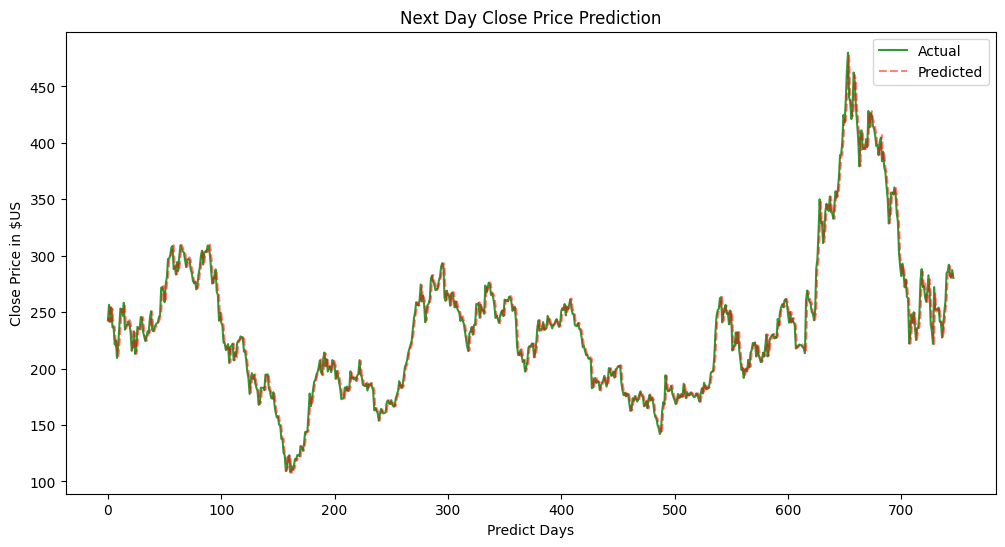

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data
tesla_data['Tomorrow_Close'] = tesla_data['Close'].shift(-1)  # Target is next day's close
tesla_data.dropna(inplace=True)  # Remove rows with NaNs

# Features and target
X = tesla_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = tesla_data['Tomorrow_Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and visualize
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import pandas as pd

# Calculate evaluation metrics
mse_linreg = mean_squared_error(y_test, predictions)
rmse_linreg = np.sqrt(mse_linreg)
mae_linreg = mean_absolute_error(y_test, predictions)
mape_linreg = mean_absolute_percentage_error(y_test, predictions) * 100
r2_linreg = r2_score(y_test, predictions)


# Create a DataFrame for metrics
metrics = {
    "Metric": ["Mean Squared Error (MSE)", 
               "Root Mean Squared Error (RMSE)", 
               "Mean Absolute Error (MAE)",
               "Mean Absolute Percentage Error (MAPE) (%)",
               "R2"],
    "Value": [mse_linreg, rmse_linreg, mae_linreg,  mape_linreg, r2_linreg]
}



metrics_df = pd.DataFrame(metrics)
display(metrics_df)

plt.figure(figsize=(12,6))
#new color
plt.plot(y_test.values, 'g', label='Actual',  alpha=0.8)
plt.plot(predictions, 'r--', label='Predicted', alpha=0.5)
plt.xlabel('Predict Days')
plt.ylabel('Close Price in $US')
plt.title('Next Day Close Price Prediction')
plt.legend()
plt.show()

In [41]:
import pandas as pd
for seq_len in sequence_lengths:
    mse = results_df[results_df['sequence_length'] == seq_len]['MSE'].values[0]
    rmse = results_df[results_df['sequence_length'] == seq_len]['RMSE'].values[0]
    mae = results_df[results_df['sequence_length'] == seq_len]['MAE'].values[0]
    mape = results_df[results_df['sequence_length'] == seq_len]['MAPE'].values[0]
    r2 = results_df[results_df['sequence_length'] == seq_len]['R2'].values[0]

    # Create a DataFrame for metrics
    metrics = {
        "Metric": ["Mean Squared Error (MSE)", 
                   "Root Mean Squared Error (RMSE)", 
                   "Mean Absolute Error (MAE)",
                   "Mean Absolute Percentage Error (MAPE) (%)",
                   "R2"],
        "Value": [mse, rmse, mae,  mape, r2]
    }
    # metrics_df = pd.DataFrame(metrics)
    # display(metrics_df)

# Create a summary DataFrame for all models
mse_30 = results_df[results_df['sequence_length'] == 30]['MSE'].values[0]
mse_60 = results_df[results_df['sequence_length'] == 60]['MSE'].values[0]
mse_90 = results_df[results_df['sequence_length'] == 90]['MSE'].values[0]
mse_120 = results_df[results_df['sequence_length'] == 120]['MSE'].values[0]

rmse_30 = results_df[results_df['sequence_length'] == 30]['RMSE'].values[0]
rmse_60 = results_df[results_df['sequence_length'] == 60]['RMSE'].values[0]
rmse_90 = results_df[results_df['sequence_length'] == 90]['RMSE'].values[0]
rmse_120 = results_df[results_df['sequence_length'] == 120]['RMSE'].values[0]

mae_30 = results_df[results_df['sequence_length'] == 30]['MAE'].values[0]
mae_60 = results_df[results_df['sequence_length'] == 60]['MAE'].values[0]
mae_90 = results_df[results_df['sequence_length'] == 90]['MAE'].values[0]
mae_120 = results_df[results_df['sequence_length'] == 120]['MAE'].values[0]

mape_30 = results_df[results_df['sequence_length'] == 30]['MAPE'].values[0]
mape_60 = results_df[results_df['sequence_length'] == 60]['MAPE'].values[0]
mape_90 = results_df[results_df['sequence_length'] == 90]['MAPE'].values[0]
mape_120 = results_df[results_df['sequence_length'] == 120]['MAPE'].values[0]

r2_30 = results_df[results_df['sequence_length'] == 30]['R2'].values[0]
r2_60 = results_df[results_df['sequence_length'] == 60]['R2'].values[0]
r2_90 = results_df[results_df['sequence_length'] == 90]['R2'].values[0]
r2_120 = results_df[results_df['sequence_length'] == 120]['R2'].values[0]

# Create a summary DataFrame for all models
results = {
    "Model": ["Linear Regression", "LSTM (30 days)", "LSTM (60 days)", "LSTM (90 days)", "LSTM (120 days)"],
    "Mean Squared Error (MSE)": [mse_linreg, mse_30, mse_60, mse_90, mse_120],
    "Root Mean Squared Error (RMSE)": [rmse_linreg, rmse_30, rmse_60, rmse_90, rmse_120],
    "Mean Absolute Error (MAE)": [mae_linreg, mae_30, mae_60, mae_90, mae_120],
    "Mean Absolute Percentage Error (MAPE) (%)": [mape_linreg, mape_30, mape_60, mape_90, mape_120],
    "R2": [r2_linreg, r2_30, r2_60, r2_90, r2_120]
}

summary_df = pd.DataFrame(results)
display(summary_df)

,Model,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE) (%),R2
0,Linear Regression,91.876474,9.585222,6.877962,2.898573,0.977802
1,LSTM (30 days),397.858353,19.946387,17.045894,7.740581,0.904866
2,LSTM (60 days),371.284382,19.268741,14.329395,6.196782,0.911935
3,LSTM (90 days),245.410865,15.665595,11.753165,5.028171,0.942230
4,LSTM (120 days),336.151140,18.334425,15.395836,6.960581,0.921512


In [ ]:
#plot all results using LSTM and Linear regression
#Linear regression is used as a baseline
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Predict Days')
plt.ylabel('Close Price in $US')
plt.title('Next Day Close Price Prediction')
plt.legend()
plt.show()

#plot all results using LSTM and Linear regression
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Predict Days')
plt.ylabel('Close Price in $US')
plt.title('Next Day Close Price Prediction')
plt.legend()
plt.show()
#plot all results using LSTM and Linear regression
